In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
customers = pd.read_csv('Customers.csv')  
transactions = pd.read_csv('Transactions.csv')  
products = pd.read_csv('Products.csv')  

In [3]:
# Check for missing values  
print(customers.isnull().sum())  
print(products.isnull().sum())  
print(transactions.isnull().sum()) 

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:

# Basic statistics  
print(transactions.describe())  

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [4]:

# Basic statistics  
print(transactions.describe())  

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [5]:
# EDA: Sales over time  
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])  
transactions.set_index('TransactionDate', inplace=True)  
monthly_sales = transactions.resample('ME').sum()['TotalValue'] 

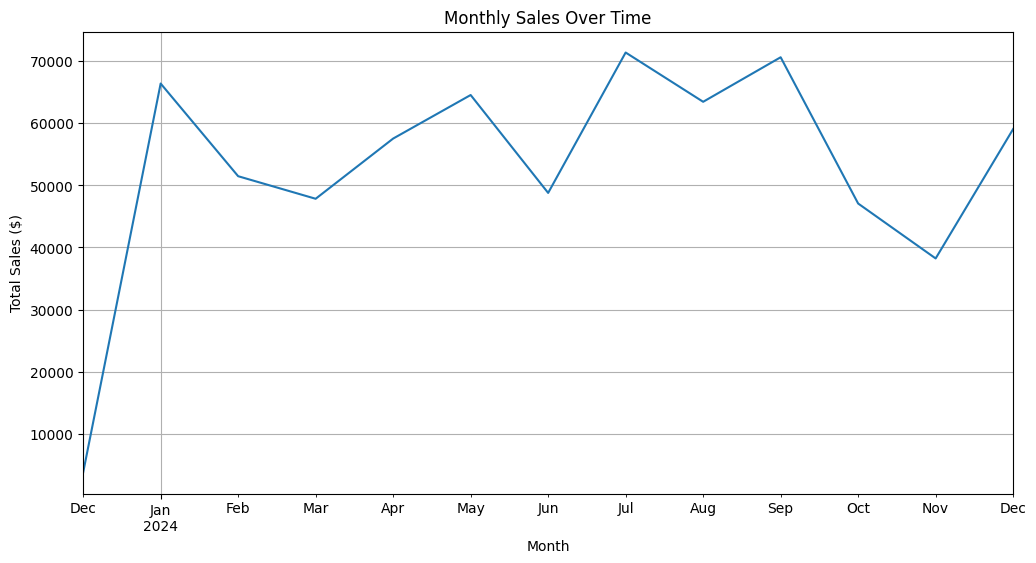

In [6]:
plt.figure(figsize=(12, 6))  
monthly_sales.plot()  
plt.title('Monthly Sales Over Time')  
plt.xlabel('Month')  
plt.ylabel('Total Sales ($)')  
plt.grid()  
plt.show()

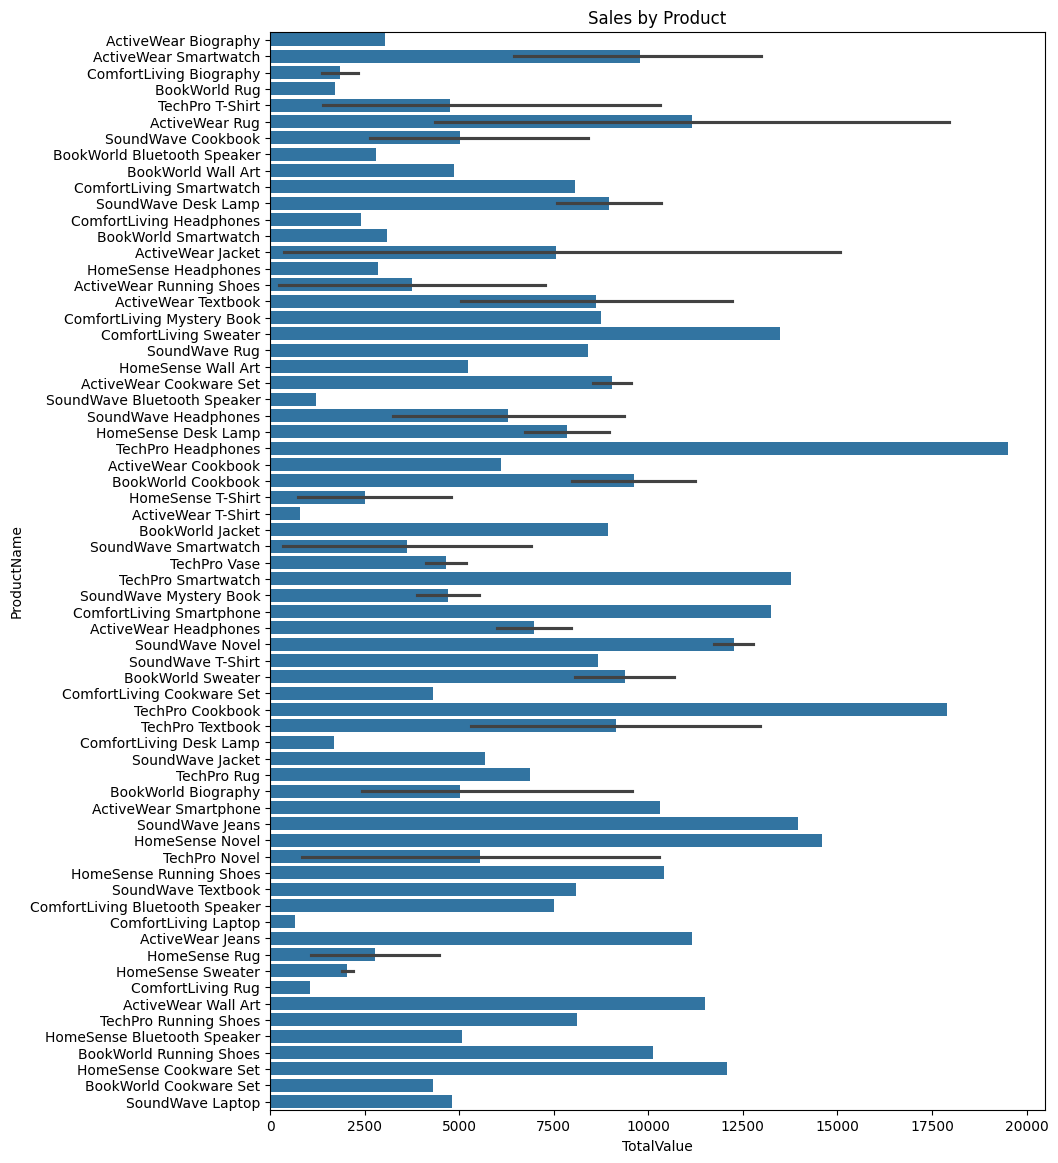

In [7]:
# Product category sales  
category_sales = transactions.groupby('ProductID').sum()['TotalValue'].reset_index()  
category_sales = category_sales.merge(products, on='ProductID', how='left')  

plt.figure(figsize=(10, 14))  
sns.barplot(data=category_sales, x='TotalValue', y='ProductName')  
plt.title('Sales by Product')  
plt.show()